In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis=1
)
train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis=1
)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zero_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 9s 20ms/step - loss: 0.6184 - accuracy: 0.8098 - val_loss: 0.2923 - val_accuracy: 0.9186
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2541 - accuracy: 0.9216 - val_loss: 0.1961 - val_accuracy: 0.9427
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1664 - accuracy: 0.9490 - val_loss: 0.1486 - val_accuracy: 0.9569
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1202 - accuracy: 0.9628 - val_loss: 0.1504 - val_accuracy: 0.9530
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0863 - accuracy: 0.9726 - val_loss: 0.1386 - val_accuracy: 0.9588
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.1188 - val_accuracy: 0.9651
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.1190 - val_accuracy: 0.9682

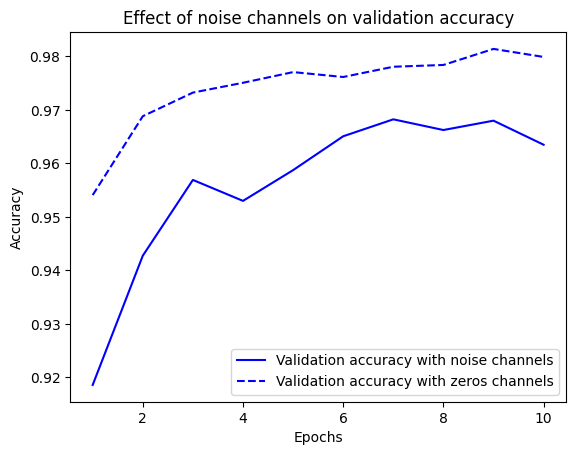

In [5]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3151 - accuracy: 0.1037 - val_loss: 2.3049 - val_accuracy: 0.1123
Epoch 2/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2997 - accuracy: 0.1170 - val_loss: 2.3072 - val_accuracy: 0.1069
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2907 - accuracy: 0.1274 - val_loss: 2.3123 - val_accuracy: 0.1012
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2802 - accuracy: 0.1392 - val_loss: 2.3232 - val_accuracy: 0.1033
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2649 - accuracy: 0.1519 - val_loss: 2.3306 - val_accuracy: 0.1036
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2459 - accuracy: 0.1651 - val_loss: 2.3464 - val_accuracy: 0.1002
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2239 - accuracy: 0.1757 - val_loss: 2.3550 - val_accuracy:

In [ ]:
import numpy as np

num_validation_samples = 10000
# 데이터를 섞는 것이 일반적으로 좋다
np.random.shuffle(data)
# 검증 세트를 만든다
validation_data = data[: num_validation_samples]
# 훈련 세트를 만든다
training_data = data[num_validation_samples :]
# 훈련 세트에서 모델을 훈련하고 검증 세트로 평가한다
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)

# 모델 튜닝, 훈련, 평가 과정 반복 ...

# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련시킨다
model = get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = mode.evaluate(test_data, ...)

In [1]:
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold : num_validation_samples * (fold + 1)]
    training_data = np.concatenate(
        data[: num_validation_samples * fold],
        data[num_validation_samples * (fold + 1) :]
    )
    model = get_model()
    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)

NameError: name 'data' is not defined

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 700.0062 - accuracy: 0.3044 - val_loss: 2.5700 - val_accuracy: 0.2179
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 2.9982 - accuracy: 0.2195 - val_loss: 2.0902 - val_accuracy: 0.2227
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 2.3451 - accuracy: 0.1916 - val_loss: 2.4834 - val_accuracy: 0.1511
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5132 - accuracy: 0.1610 - val_loss: 5.8882 - val_accuracy: 0.2049
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 2.3571 - accuracy: 0.1840 - val_loss: 2.2087 - val_accuracy: 0.1981
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 2.4997 - accuracy: 0.1825 - val_loss: 2.4865 - val_accuracy: 0.1991
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 2.2679 - accuracy: 0.1903 - val_loss: 2.3324 - val_accuracy: 0.2142
Ep

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.3281 - accuracy: 0.9149 - val_loss: 0.1497 - val_accuracy: 0.9585
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1235 - accuracy: 0.9648 - val_loss: 0.1173 - val_accuracy: 0.9696
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0978 - accuracy: 0.9735 - val_loss: 0.1506 - val_accuracy: 0.9681
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0800 - accuracy: 0.9785 - val_loss: 0.1587 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0695 - accuracy: 0.9825 - val_loss: 0.1722 - val_accuracy: 0.9734
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0603 - accuracy: 0.9851 - val_loss: 0.1723 - val_accuracy: 0.9721
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0497 - accuracy: 0.9882 - val_loss: 0.1685 - val_accuracy: 0.9732
Epoch

In [4]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6635 - accuracy: 0.8354 - val_loss: 0.3604 - val_accuracy: 0.9055
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3525 - accuracy: 0.9033 - val_loss: 0.3105 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3180 - accuracy: 0.9121 - val_loss: 0.2930 - val_accuracy: 0.9199
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3018 - accuracy: 0.9162 - val_loss: 0.2830 - val_accuracy: 0.9225
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2919 - accuracy: 0.9193 - val_loss: 0.2794 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.9205 - val_loss: 0.2765 - val_accuracy: 0.9230
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2804 - accuracy: 0.9222 - val_loss: 0.2724 - val_accuracy: 0.9247
Epoch 

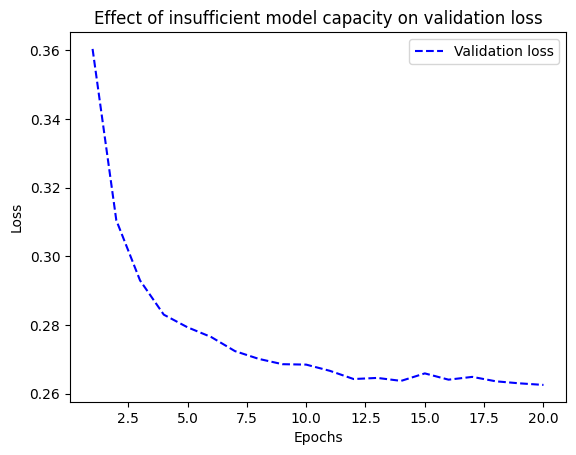

In [6]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3685 - accuracy: 0.8972 - val_loss: 0.2098 - val_accuracy: 0.9398
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1629 - accuracy: 0.9520 - val_loss: 0.1398 - val_accuracy: 0.9596
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1146 - accuracy: 0.9651 - val_loss: 0.1170 - val_accuracy: 0.9654
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0896 - accuracy: 0.9729 - val_loss: 0.1038 - val_accuracy: 0.9692
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0718 - accuracy: 0.9783 - val_loss: 0.1064 - val_accuracy: 0.9678
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0597 - accuracy: 0.9814 - val_loss: 0.0976 - val_accuracy: 0.9717
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0967 - val_accuracy: 0.9737
Epoch 

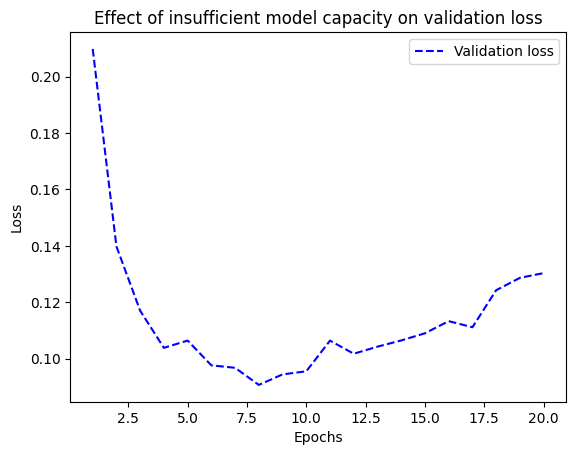

In [9]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [15]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5868 - accuracy: 0.7423 - val_loss: 0.4706 - val_accuracy: 0.8391
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3961 - accuracy: 0.8800 - val_loss: 0.3635 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2894 - accuracy: 0.9095 - val_loss: 0.3044 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2325 - accuracy: 0.9233 - val_loss: 0.2839 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1930 - accuracy: 0.9367 - val_loss: 0.3038 - val_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1661 - accuracy: 0.9467 - val_loss: 0.2804 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1442 - accuracy: 0.9521 - val_loss: 0.2985 - val_accuracy: 0.8827
Epoch 8/20
30

In [18]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6439 - accuracy: 0.7163 - val_loss: 0.5900 - val_accuracy: 0.7856
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5312 - accuracy: 0.8520 - val_loss: 0.4898 - val_accuracy: 0.8414
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4264 - accuracy: 0.8881 - val_loss: 0.4082 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3485 - accuracy: 0.9043 - val_loss: 0.3580 - val_accuracy: 0.8801
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2936 - accuracy: 0.9165 - val_loss: 0.3267 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2543 - accuracy: 0.9258 - val_loss: 0.3166 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2247 - accuracy: 0.9325 - val_loss: 0.2892 - val_accuracy: 0.8861
Epoch 8/20
30

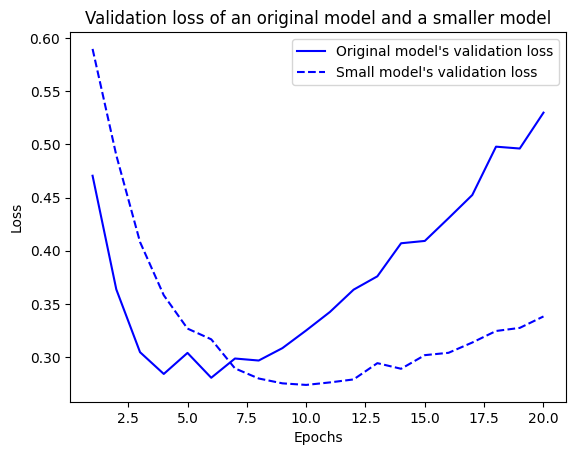

In [19]:
original_val_loss = history_original.history["val_loss"]
small_val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, original_val_loss, "b-", label="Original model's validation loss")
plt.plot(epochs, small_val_loss, "b--", label="Small model's validation loss")
plt.title("Validation loss of an original model and a smaller model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 8s 220ms/step - loss: 0.5674 - accuracy: 0.7039 - val_loss: 0.5095 - val_accuracy: 0.7609
Epoch 2/20
30/30 [==============================] - 6s 209ms/step - loss: 0.3405 - accuracy: 0.8591 - val_loss: 0.3370 - val_accuracy: 0.8615
Epoch 3/20
30/30 [==============================] - 6s 208ms/step - loss: 0.2499 - accuracy: 0.8982 - val_loss: 0.2783 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 6s 212ms/step - loss: 0.1850 - accuracy: 0.9279 - val_loss: 0.2816 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 6s 204ms/step - loss: 0.1431 - accuracy: 0.9457 - val_loss: 0.2953 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 6s 210ms/step - loss: 0.1047 - accuracy: 0.9629 - val_loss: 0.4662 - val_accuracy: 0.8377
Epoch 7/20
30/30 [==============================] - 6s 195ms/step - loss: 0.0895 - accuracy: 0.9706 - val_loss: 0.3683 - val_accuracy: 0.8779
Epoch 

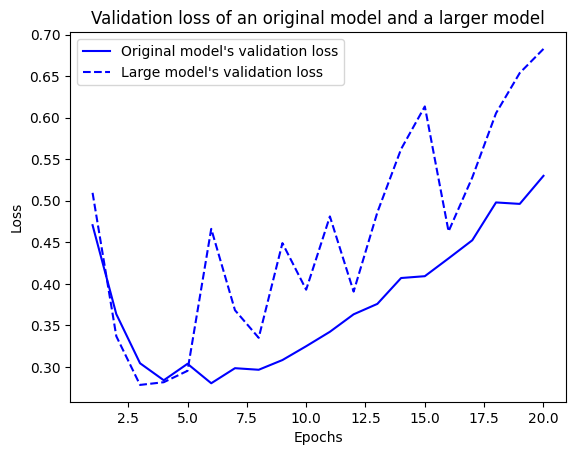

In [21]:
original_val_loss = history_original.history["val_loss"]
large_val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, original_val_loss, "b-", label="Original model's validation loss")
plt.plot(epochs, large_val_loss, "b--", label="Large model's validation loss")
plt.title("Validation loss of an original model and a larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 3s 47ms/step - loss: 0.6334 - accuracy: 0.7730 - val_loss: 0.5085 - val_accuracy: 0.8419
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4283 - accuracy: 0.8848 - val_loss: 0.4286 - val_accuracy: 0.8621
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3522 - accuracy: 0.9055 - val_loss: 0.4204 - val_accuracy: 0.8586
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3119 - accuracy: 0.9212 - val_loss: 0.3936 - val_accuracy: 0.8699
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2877 - accuracy: 0.9285 - val_loss: 0.3648 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2745 - accuracy: 0.9331 - val_loss: 0.3668 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2596 - accuracy: 0.9400 - val_loss: 0.3713 - val_accuracy: 0.8812
Epoch 8/20
30

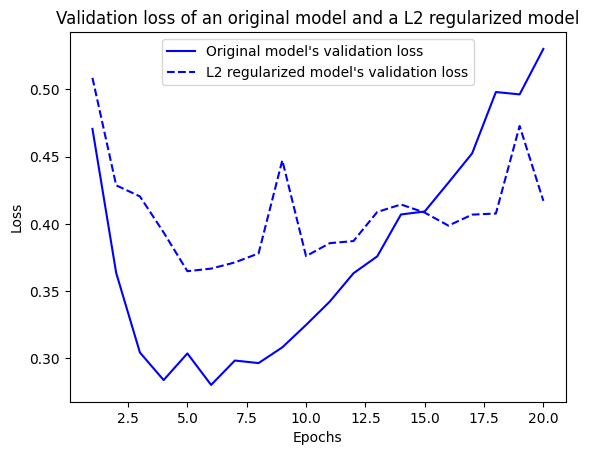

In [23]:
original_val_loss = history_original.history["val_loss"]
l2_val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, original_val_loss, "b-", label="Original model's validation loss")
plt.plot(epochs, l2_val_loss, "b--", label="L2 regularized model's validation loss")
plt.title("Validation loss of an original model and a L2 regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)                  # L1 가중치 규제
regularizers.l1_l2(l1=0.001, l2=0.001)  # L1, L2 가중치 규제 병행

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.6373 - accuracy: 0.6211 - val_loss: 0.5430 - val_accuracy: 0.8408
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5270 - accuracy: 0.7494 - val_loss: 0.4172 - val_accuracy: 0.8669
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4477 - accuracy: 0.8109 - val_loss: 0.3516 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3851 - accuracy: 0.8503 - val_loss: 0.3075 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3325 - accuracy: 0.8747 - val_loss: 0.2889 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2923 - accuracy: 0.8943 - val_loss: 0.2768 - val_accuracy: 0.8927
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2579 - accuracy: 0.9119 - val_loss: 0.2789 - val_accuracy: 0.8915
Epoch 8/20
30

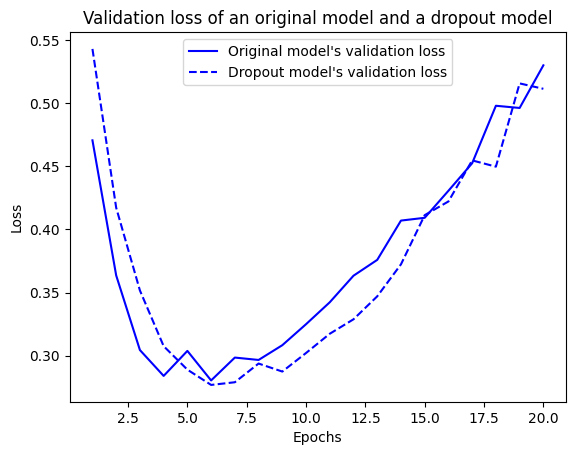

In [27]:
original_val_loss = history_original.history["val_loss"]
dropout_val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, original_val_loss, "b-", label="Original model's validation loss")
plt.plot(epochs, dropout_val_loss, "b--", label="Dropout model's validation loss")
plt.title("Validation loss of an original model and a dropout model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()